In [1]:
# Imports
import random
import string
import tempfile
import shutil
import subprocess as sp
import os

from PIL import Image
from torch import nn as nn
from torch import Generator
from torch.utils.data import random_split,DataLoader
# TODO: Currently assumes that pytest runs from project root
from util.car_dataset import check_dir, check_file, CarDataset, DatasetError
from networks.common import *
from networks.CNNbase import CNNBasic

In [2]:
# Helper Functions
def rand_string(length=5):
    return ''.join(random.choices(string.ascii_letters +
        string.digits, k=length))

def loaded_dataset(temp_dir):
    '''
    Loads the car_dataset and returns the CarDataset object.
    '''
    #image_folder_list = ['0_Frames','1_Frames','2_Frames','3_Frames']
    #label_file_list = ['0.txt','1.txt','2.txt','3.txt']
    image_folder_list = ['0_Frames']
    label_file_list = ['0.txt']
    car_data = CarDataset(temp_dir,image_folder_list,label_file_list)
    car_data.drop_nan()

    return car_data

def dataset_loader(loaded_dataset):
    length = len(loaded_dataset)
    split_set = random_split(loaded_dataset,[round(0.80*length)
                ,round(0.20*length)],generator=Generator().manual_seed(42))
    train_loader = DataLoader(split_set[0],batch_size=20)
    test_loader = DataLoader(split_set[1],batch_size=1)
    '''
    Lowering values to sane levels to help run tests on github
    runners. Ideally on local GPU (4GB) 80/20 split with batch size of
    30 works well.
    '''
    return (train_loader,test_loader)

def network(alpha=0):
    network = CNNBasic(alpha)
    network = network.to(get_device())
    network.double()
    return network

In [3]:
def loaded_test_dataset(temp_dir):
    '''
    Loads the car_dataset and returns the CarDataset object.
    '''
    #image_folder_list = ['0_Frames','1_Frames','2_Frames','3_Frames']
    #label_file_list = ['0.txt','1.txt','2.txt','3.txt']
    image_folder_list = ['4_Frames']
    label_file_list = ['4.txt']
    car_data = CarDataset(temp_dir,image_folder_list,label_file_list)
    car_data.drop_nan()

    return car_data

In [4]:
root = os.getcwd()
print(os.getcwd())

/home/akshay.viswakumar/dl-based-sensor-calib


In [5]:
# Load Data
data = loaded_dataset(os.path.join(root,"dummy"))

In [6]:
# Split Dataset
datasets = dataset_loader(data)

In [7]:
# Initialize Network
net = network(alpha=2)

In [8]:
# Train
train = datasets[0]
test = datasets[1]
print("Start Training")
losses = run_training(net,train,test,5,get_device())

0it [00:00, ?it/s]

Start Training


48it [00:43,  1.11it/s]
0it [00:00, ?it/s]

Num = 240
Len = 240
Test Set Average Loss 0.001559
Train Epoch: 0	Train Loss: 0.001946 Test Loss:0.001559


48it [00:43,  1.12it/s]
0it [00:00, ?it/s]

Num = 240
Len = 240
Test Set Average Loss 0.001304
Train Epoch: 1	Train Loss: 0.001480 Test Loss:0.001304


48it [00:42,  1.12it/s]
0it [00:00, ?it/s]

Num = 240
Len = 240
Test Set Average Loss 0.001217
Train Epoch: 2	Train Loss: 0.001307 Test Loss:0.001217


48it [00:42,  1.12it/s]
0it [00:00, ?it/s]

Num = 240
Len = 240
Test Set Average Loss 0.001156
Train Epoch: 3	Train Loss: 0.001207 Test Loss:0.001156


48it [00:42,  1.12it/s]


Num = 240
Len = 240
Test Set Average Loss 0.001071
Train Epoch: 4	Train Loss: 0.001126 Test Loss:0.001071


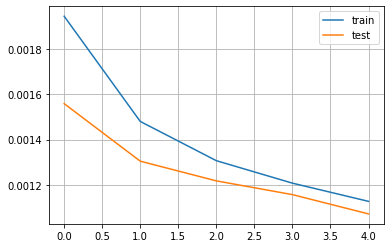

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.grid()
plt.plot(losses[0],label='train')
plt.plot(losses[1],label='test')
plt.legend()